#                                         Programming for AI

#                                              Assignment 4

##  Included libraries:

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import seaborn as sns
import requests
from bs4 import BeautifulSoup

###                                                                     Question 1:

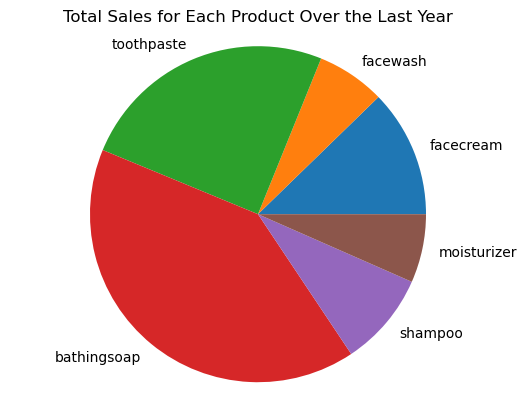

In [1]:
company_file = 'company_sales_data.csv'  # Replace with the actual path to your file
df = pd.read_csv(company_file)
#sums of all the data from the columns/labels
total_sales = df[['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']].sum()
labels = total_sales.index   #labels for plotting
values = total_sales.values  #values for labels

plt.pie(values, labels=labels)  #plotting data
plt.title('Total Sales for Each Product Over the Last Year')
plt.axis('equal')  #equal aspect ratio for drawing pie as a circle
plt.show()

###                                                                     Question 2:

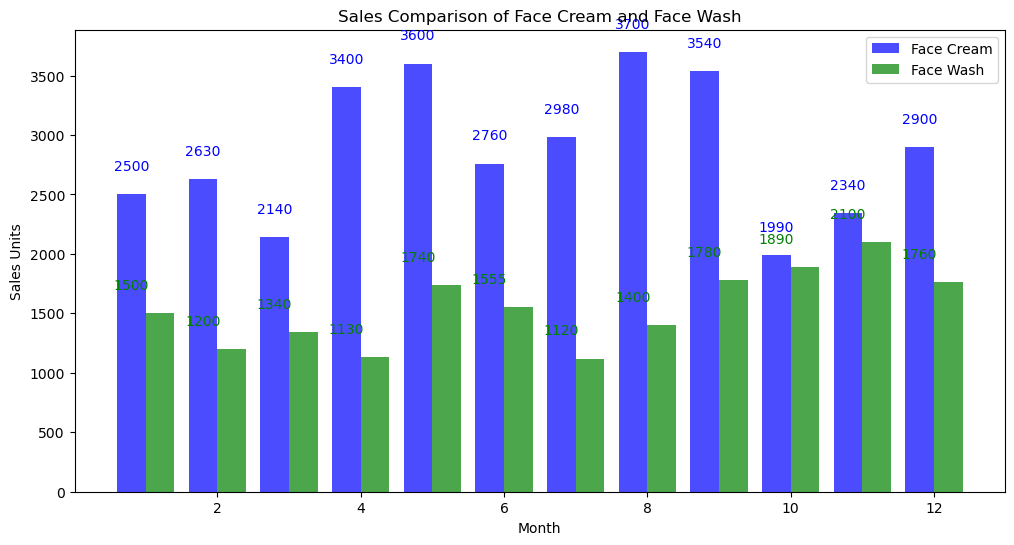

In [2]:
df = pd.read_csv(company_file)   #the same company_sales_data.csv file
facecream_sales = df['facecream']   #data extraction of face cream sales
facewash_sales = df['facewash']   #data extraction of face wash sales
length_file = len(facecream_sales)

plt.figure(figsize=(12, 6))   #figure size
#plotting on the bar graph with facecream and facewash sales data
plt.bar(df['month_number'] - 0.2, facecream_sales, width=0.4, label='Face Cream', color='blue', align='center', alpha=0.7)
plt.bar(df['month_number'] + 0.2, facewash_sales, width=0.4, label='Face Wash', color='green', alpha=0.7)
for i in range(length_file):
    plt.text(df['month_number'][i] - 0.2, facecream_sales[i] + 200, str(facecream_sales[i]), color='blue', ha='center')
for i in range(length_file):
    plt.text(df['month_number'][i] - 0.2, facewash_sales[i] + 200, str(facewash_sales[i]), color='green', ha='center')

plt.title('Sales Comparison of Face Cream and Face Wash')
plt.xlabel('Month')
plt.ylabel('Sales Units')
plt.legend()

###                                                                     Question 3:

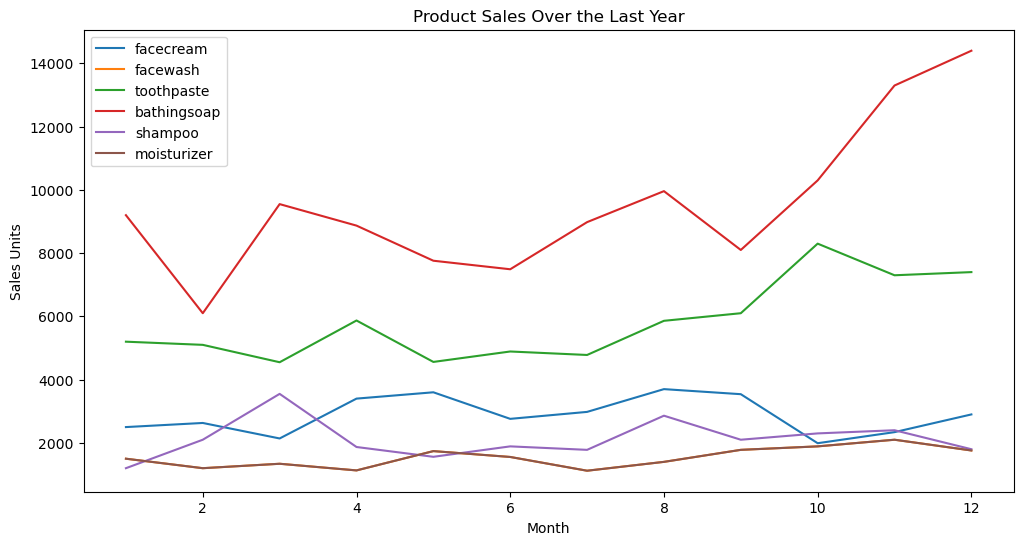

In [3]:
df = pd.read_csv(company_file)   #the same company_sales_data.csv file
products = df.columns[1:7]  # Assuming the product columns start from the second column

# Plot multiline
plt.figure(figsize=(12, 6))
for product in products:
    plt.plot(df['month_number'], df[product], label=product)

plt.title('Product Sales Over the Last Year')
plt.xlabel('Month')
plt.ylabel('Sales Units')
plt.legend()

###                                                                     Question 4:

First 5 rows of company_sales_data.csv:
   month_number  facecream  facewash  toothpaste  bathingsoap  shampoo  \
0             1       2500      1500        5200         9200     1200   
1             2       2630      1200        5100         6100     2100   
2             3       2140      1340        4550         9550     3550   
3             4       3400      1130        5870         8870     1870   
4             5       3600      1740        4560         7760     1560   

   moisturizer  total_units  total_profit  
0         1500        21100        211000  
1         1200        18330        183300  
2         1340        22470        224700  
3         1130        22270        222700  
4         1740        20960        209600  
Basic statistics of numerical columns:
       month_number    facecream     facewash   toothpaste   bathingsoap  \
count     12.000000    12.000000    12.000000    12.000000     12.000000   
mean       6.500000  2873.333333  1542.916667  5825.833333  

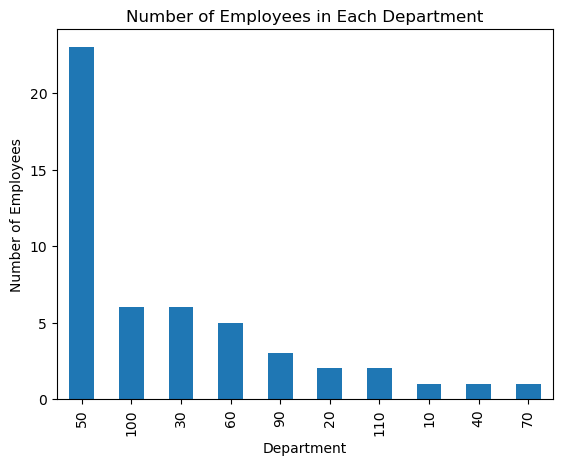

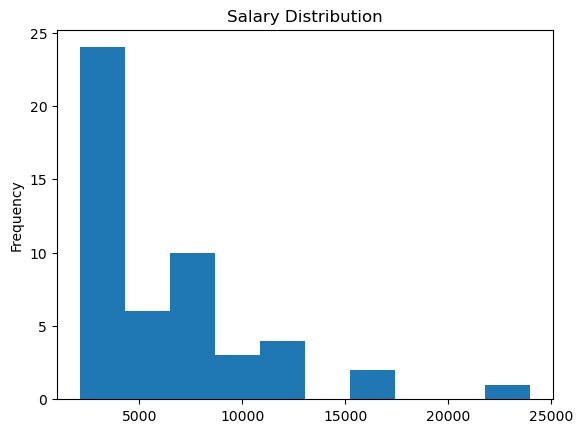

Total salary expenditure by department:
DEPARTMENT_ID
10      4400
20     19000
30     24900
40      6500
50     85600
60     28800
70     10000
90     58000
100    51608
110    20308
Name: SALARY, dtype: int64
Department with the highest total salary expenditure: 50


In [4]:
#task 1:Reading the company_sales_data.csv file and displaying
#the first 5 rows, also checking basic statistics using describe()
sales_data = pd.read_csv('company_sales_data.csv')
print("First 5 rows of company_sales_data.csv:")
print(sales_data.head())
print("Basic statistics of numerical columns:")
print(sales_data.describe())

#task 2:Checking for missing values and removing duplicate rows
print("Missing values:")
print(sales_data.isnull().sum())
sales_data.drop_duplicates(inplace=True)

#task 3:Calculating and displaying the average salary of employees
employees_data = pd.read_csv('employees.csv')
average_salary = employees_data['SALARY'].mean()
print("Average salary of employees:", average_salary)
highest_salary_employee = employees_data.loc[employees_data['SALARY'].idxmax()]  #checking one with highest salary
print("Employee with the highest salary:")
print(highest_salary_employee)

#task 4:determining the number of employees in each department and calculating average salary of each department
employee_count_by_department = employees_data['DEPARTMENT_ID'].value_counts()
print("Number of employees in each department:")
print(employee_count_by_department)
average_salary_by_department = employees_data.groupby('DEPARTMENT_ID')['SALARY'].mean()
print("Average salary by department:")
print(average_salary_by_department)

#task 5:converting the "HIREDATE" column to a datetime object, then identifying people hired in 2022
employees_data['HIRE_DATE'] = pd.to_datetime(employees_data['HIRE_DATE'])
recently_hired_employees = employees_data[employees_data['HIRE_DATE'].dt.year == 2022]
print("Employees hired in the last year:")
print(recently_hired_employees)

#task 6:create a new DataFrame containing only the employees from the "IT" department
#and also sorting data by salary in descending order
it_department_employees = employees_data[employees_data['DEPARTMENT_ID'] == 'IT']
it_department_employees_sorted = it_department_employees.sort_values('SALARY', ascending=False)
print("Employees in the IT department, sorted by salary:")
print(it_department_employees_sorted)

#task 7:using Matplotlib to create a bar chart showing the number of employees in each department
#Also creating a histogram for visual representation for Salary distribution
employee_count_by_department.plot(kind='bar', xlabel='Department', ylabel='Number of Employees')
plt.title('Number of Employees in Each Department')
plt.show()
employees_data['SALARY'].plot(kind='hist', bins=10, xlabel='Salary', ylabel='Frequency')
plt.title('Salary Distribution')
plt.show()

#task 8:calculating the total salary expenditure for each department
#also, identifing the department with the highest total salary expenditure
total_salary_expenditure_by_department = employees_data.groupby('DEPARTMENT_ID')['SALARY'].sum()
print("Total salary expenditure by department:")
print(total_salary_expenditure_by_department)
department_with_highest_salary_expenditure = total_salary_expenditure_by_department.idxmax()
print("Department with the highest total salary expenditure:", department_with_highest_salary_expenditure)

## Question 5:

C:\Users\gamer\AppData\Local\Temp\ipykernel_4256\2751312190.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv("fatalities.csv", parse_dates=["date_of_event", "date_of_death"])   #converting into data frame
C:\Users\gamer\AppData\Local\Temp\ipykernel_4256\2751312190.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv("fatalities.csv", parse_dates=["date_of_event", "date_of_death"])   #converting into data frame


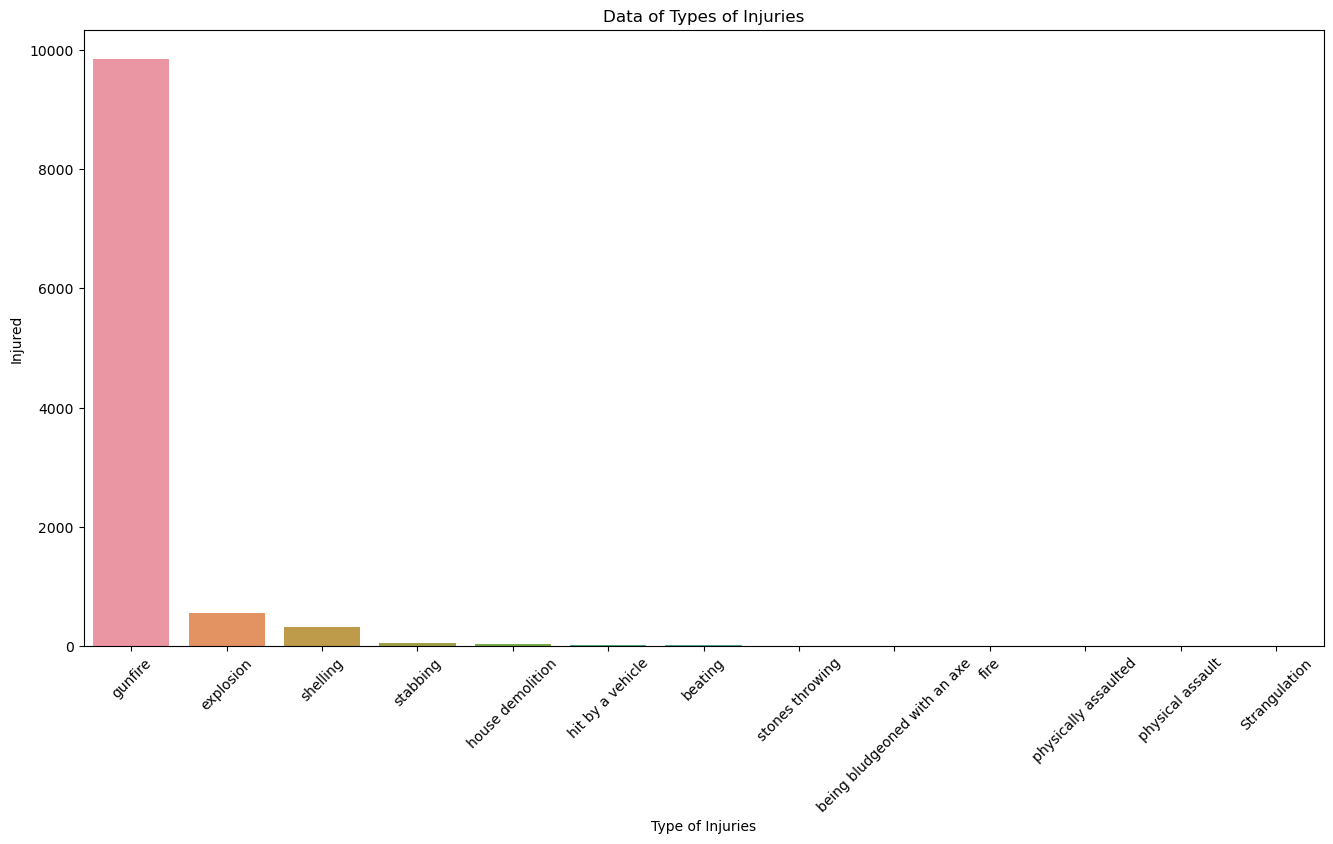

The most common type of injuries are from: gunfire


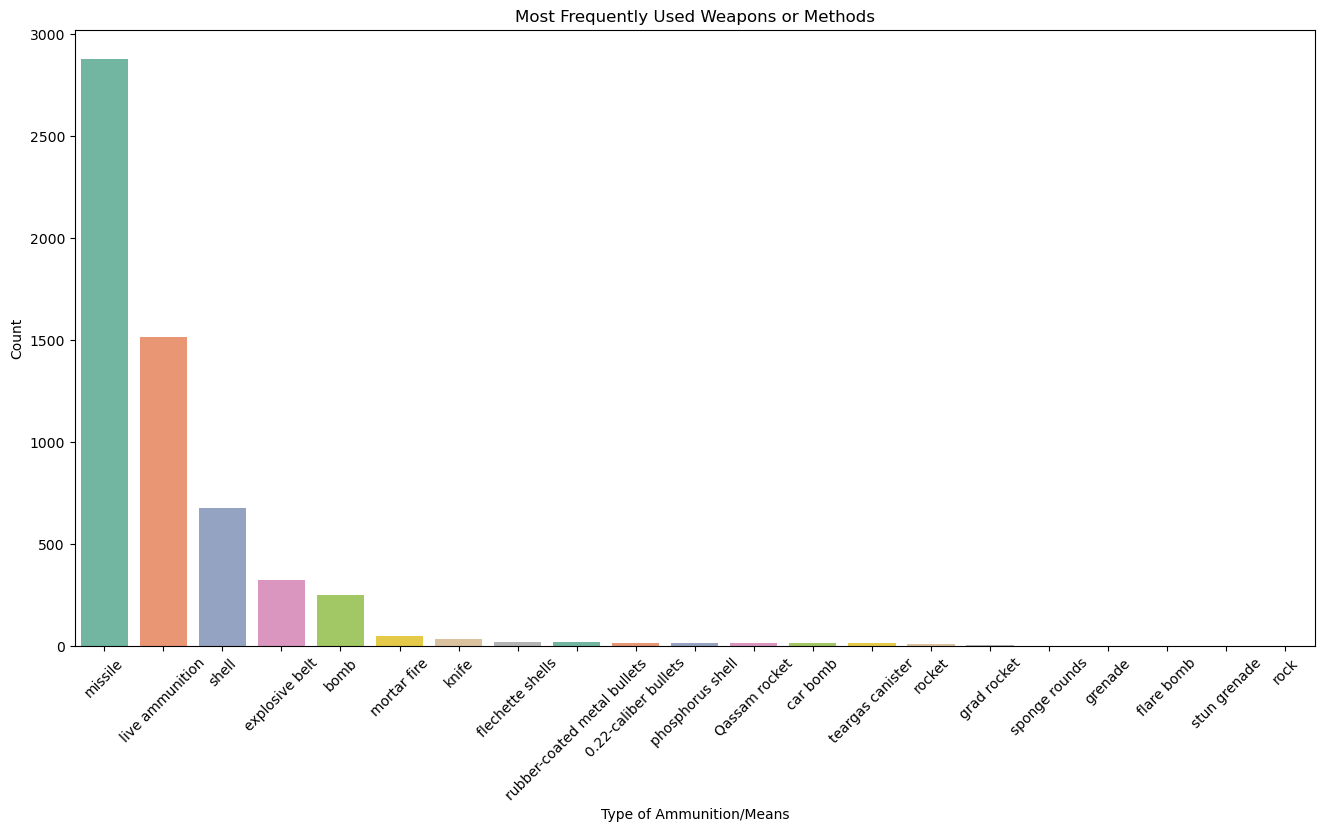

The most frequent methods used: missile
Impact of missiles: 2877


In [12]:
#Part(a)
#Examining the fatalities on the people of palestine and gaza and then showing them using folium
df = pd.read_csv("fatalities.csv", parse_dates=["date_of_event", "date_of_death"])   #converting into data frame
df.columns = df.columns.str.strip()    #because our file is case sensitive, we used strip() for clearing space
map_center = [df['latitude'].mean(), df['longitude'].mean()]   #since the data set is too long, we should have a centre of map
mymap = folium.Map(location=map_center, zoom_start=10)
marker_cluster = MarkerCluster().add_to(mymap)   #added clusters to our map
for index, row in df.iterrows():
    popup_text = f"{row['name']} - {row['notes']}"   #for showing only the first 5 data sets
    folium.Marker(location=[row['latitude'], row['longitude']], popup=popup_text).add_to(marker_cluster) #also putting popups on them
mymap.save("fatalities_map.html")  #then saving our image into an html file

#Part(b)
#Examining the types of injuries inflicted on individuals using seaborn library
plt.figure(figsize=(16,8))
injuries_count = df['type_of_injury'].value_counts()   #counting the types of injuries
sns.barplot(x=injuries_count.index, y=injuries_count.values)  #plotting the graph
plt.xlabel('Type of Injuries')   #X-axis label
plt.ylabel('Injured')   #Y-axis label
plt.title('Data of Types of Injuries')   #title of the graph
plt.xticks(rotation=45)
plt.show()
#Also identifying the most common injury
print('The most common type of injuries are from:', injuries_count.idxmax())



plt.figure(figsize=(16,8))
# Analyze ammunition and means of individuals killed
weapons_count = df['ammunition'].value_counts()
sns.barplot(x=weapons_count.index, y=weapons_count.values, palette="Set2")
plt.xlabel('Type of Ammunition/Means')
plt.ylabel('Count')
plt.title('Most Frequently Used Weapons or Methods')
plt.xticks(rotation=45)
plt.show()

weapon = weapons_count.idxmax()
print('The most frequent methods used:',weapon)
print(f"Impact of {weapon}s:",weapons_count.max())

###                                                                     Question 6:

In [60]:
url = "https://www.dawn.com/"  #the url of dawn news
response = requests.get(url)   #getting the url
if response.status_code == 200:  #checking the response code
    soup = BeautifulSoup(response.content, 'html.parser')   #parsing the code using html.parser
    h2_tags = soup.find_all('h2')   #finding all the h2 tags
    for h2 in h2_tags:    #for checking h2 tags
        a_tags = h2.find_all('a')   #finding all a tags
        for link in a_tags:   #checking all the href links
            href = link.get('href')  #getting a href links
            text = link.get_text()   #getting their text
            if href:
                print(text, href)    #printing text and link
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

Today's Paper | December 06, 2023 https://epaper.dawn.com
Palestinians in Gaza living in ‘utter, deepening horror’: UN https://www.dawn.com/live/pakistan
Bulls take PSX to another peak above 63,000 level https://www.dawn.com/news/1795515/bulls-take-psx-to-another-peak-above-63000-level
PPP questions Fazl’s call for ‘peaceful election atmosphere’ https://www.dawn.com/news/1795542/ppp-questions-fazls-call-for-peaceful-election-atmosphere
ECP to hold contempt case proceedings against Imran at Adiala Jail on Dec 13 https://www.dawn.com/news/1795570/ecp-to-hold-contempt-case-proceedings-against-imran-at-adiala-jail-on-dec-13
Test skipper Shan Masood hits century in Australia warm-up https://www.dawn.com/news/1795576/test-skipper-shan-masood-hits-century-in-australia-warm-up
Journalist Asma Shirazi says faith in justice system restored after IHC asks ARY News to apologise to her https://www.dawn.com/news/1795588/journalist-asma-shirazi-says-faith-in-justice-system-restored-after-ihc-asks-ary